In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv("uber.csv")

In [73]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [75]:
df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


In [77]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [78]:
df.dropna(inplace=True)

In [79]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [80]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [81]:
def haversineDistance(lon1, lat1, lon2, lat2):
   R = 6371  # Radius of the Earth in km
   # Converting degrees to radians
   lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
   dlat = lat2 - lat1
   dlon = lon2 - lon1

   a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
   c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

   distance = R * c
   return distance


df = df[(df['pickup_longitude'] >= -80) & (df['pickup_longitude'] <= -70)]
df = df[(df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 45)]
df = df[(df['dropoff_longitude'] >= -80) & (df['dropoff_longitude'] <= -70)]
df = df[(df['dropoff_latitude'] >= 40) & (df['dropoff_latitude'] <= 45)]
df['distance_in_KM'] = haversineDistance(df['pickup_longitude'], df['pickup_latitude'],
                                    df['dropoff_longitude'], df['dropoff_latitude'])

In [82]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_KM
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


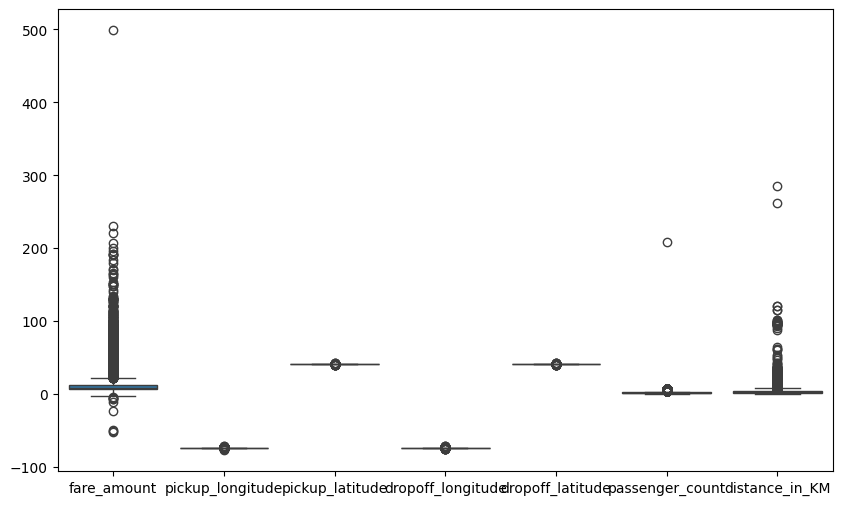

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [84]:
for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    df=df[(df[col]>=lb) & (df[col]<=ub)]

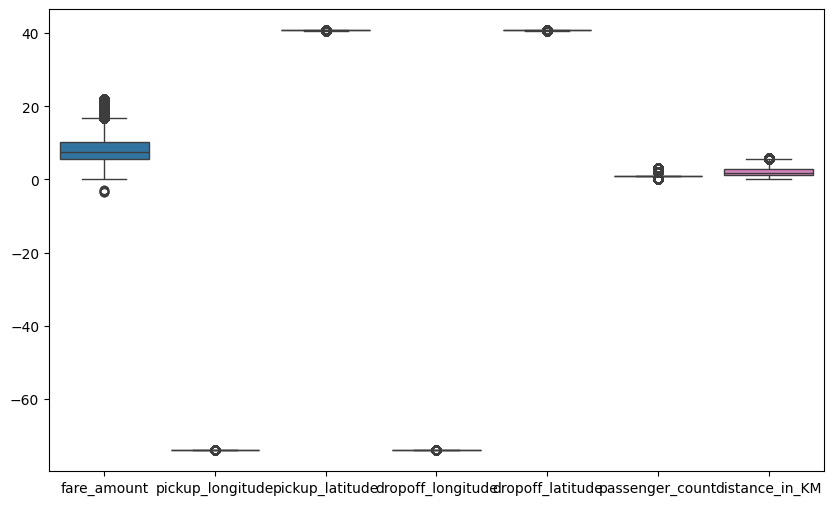

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [86]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_KM
fare_amount,1.000000,-0.051497,-0.067390,-0.028099,-0.099287,0.019883,0.768824
pickup_longitude,-0.051497,1.000000,0.685198,0.477589,0.432447,-0.022196,-0.047465
pickup_latitude,-0.067390,0.685198,1.000000,0.408870,0.602942,-0.018835,-0.054769
dropoff_longitude,-0.028099,0.477589,0.408870,1.000000,0.640350,-0.019818,0.006949
dropoff_latitude,-0.099287,0.432447,0.602942,0.640350,1.000000,-0.016661,-0.045426
passenger_count,0.019883,-0.022196,-0.018835,-0.019818,-0.016661,1.000000,0.013725
distance_in_KM,0.768824,-0.047465,-0.054769,0.006949,-0.045426,0.013725,1.000000


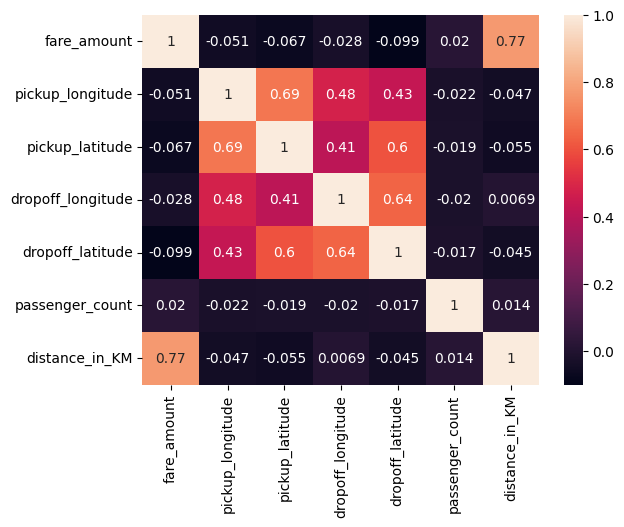

In [87]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x=df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_in_KM']]
y=df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [89]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(x_test)

In [91]:
r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

R2 Score:  0.597694198766316
RMSE:  2.222175483584684


In [92]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [93]:
y_pred = model1.predict(x_test)

In [94]:
r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

R2 Score:  0.6483482858568108
RMSE:  2.0775743446868535
